In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import glob
import os

In [2]:
# Specify the path where your CSV files are located
csv_files = glob.glob('Data/Cars/*.csv')

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate through each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    file = file[10:-4]
    df['Brand'] = file 
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)


In [3]:
#Create a copy of df to use
df = combined_df.copy()
df = df.drop('tax(£)', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104641 entries, 0 to 104640
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         104641 non-null  object 
 1   year          104641 non-null  int64  
 2   price         104641 non-null  int64  
 3   transmission  104641 non-null  object 
 4   mileage       104641 non-null  int64  
 5   fuelType      104641 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    104641 non-null  float64
 9   Brand         104641 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.0+ MB


In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [6]:
num_rows, num_columns = df.shape
print("This dataset has ", num_rows, " rows and ", num_columns, " columns")

This dataset has  104641  rows and  10  columns


In [7]:
#Check nulls
df.isna().sum()

model               0
year                0
price               0
transmission        0
mileage             0
fuelType            0
tax             10314
mpg              5454
engineSize          0
Brand               0
dtype: int64

In [8]:
#Handling missing values
df['tax']=df['tax'].fillna(df['tax'].mean())
df['mpg']=df['mpg'].fillna(df['mpg'].mean())

In [9]:
#Check nulls
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Brand           0
dtype: int64

In [10]:
#Initial diagnosis
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
year,104641.0,2017.09,2.13,1970.0,2016.00,2017.00,2019.0,2060.0
price,104641.0,16637.34,9693.39,450.0,10000.00,14440.00,20395.0,159999.0
mileage,104641.0,23049.41,21120.06,1.0,7530.00,17360.00,32234.0,323000.0
tax,104641.0,120.26,60.20,0.0,120.26,145.00,145.0,580.0
mpg,104641.0,55.17,15.71,0.3,47.10,55.17,61.7,470.8
engineSize,104641.0,1.65,0.55,0.0,1.20,1.50,2.0,6.6


In [26]:
cat_features = [column for column in df.columns if (df[column].dtypes == 'object') ]
print("Categorical Features: ")
cat_features

Categorical Features: 


['model', 'transmission', 'fuelType', 'Brand']

In [25]:
numeric_features = [column for column in df.columns if (df[column].dtypes != 'object') ]
print("Numeric Features: ")
numeric_features

Numeric Features: 


['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

In [27]:
#What brands do we have?
df['Brand'].unique()

array(['audi', 'bmw', 'focus', 'ford', 'hyundi', 'merc', 'skoda',
       'toyota', 'vauxhall', 'vw'], dtype=object)

In [38]:
df_bmw = df.loc[
    df['Brand'] =='bmw'
]

In [50]:
df.groupby(['Brand'])['mileage'].mean().sort_values(ascending=False).round().reset_index(name='Mileage')

,Brand,Mileage
0,bmw,25497.0
1,audi,24827.0
2,vauxhall,23499.0
3,ford,23364.0
4,focus,22877.0
5,toyota,22857.0
6,vw,22093.0
7,merc,21950.0
8,hyundi,21486.0
9,skoda,20118.0


In [53]:
df_bmw.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
year,10781.0,2017.0,2.0,1996.0,2016.0,2017.0,2019.0,2020.0
price,10781.0,22733.0,11416.0,1200.0,14950.0,20462.0,27940.0,123456.0
mileage,10781.0,25497.0,25143.0,1.0,5529.0,18347.0,38206.0,214000.0
tax,10781.0,132.0,62.0,0.0,135.0,145.0,145.0,580.0
mpg,10781.0,56.0,31.0,6.0,46.0,53.0,63.0,471.0
engineSize,10781.0,2.0,1.0,0.0,2.0,2.0,2.0,7.0


<Axes: xlabel='mileage', ylabel='Count'>

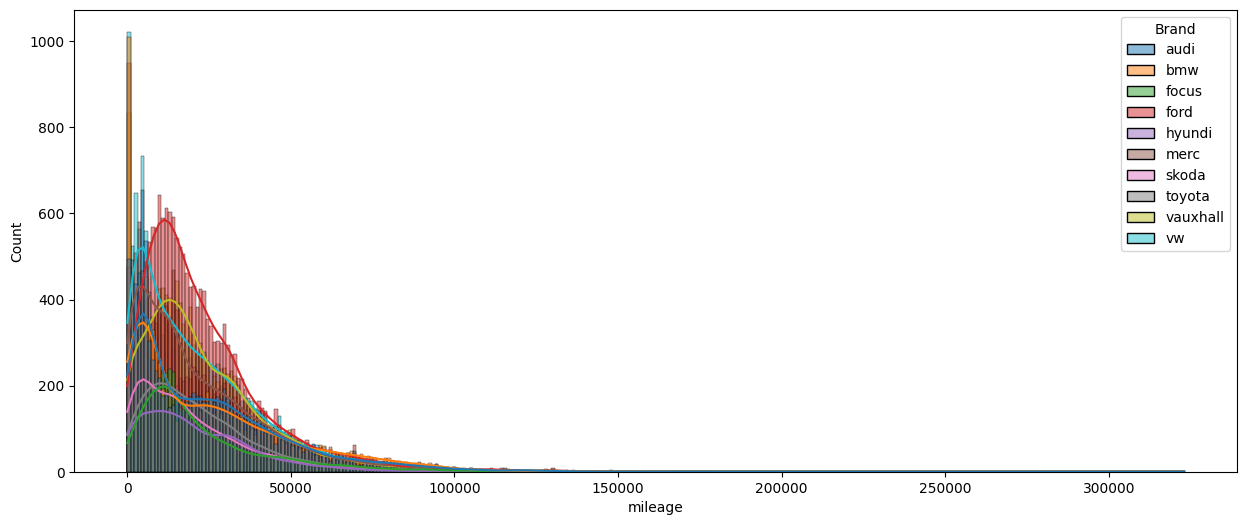

In [58]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,x='mileage',kde=True,hue='Brand')

<Axes: xlabel='mileage', ylabel='Count'>

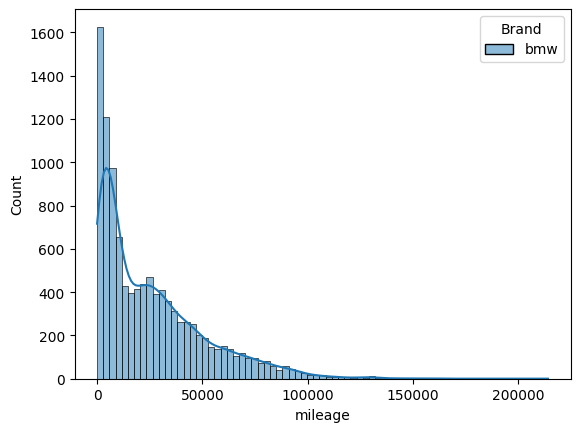

In [55]:
sns.histplot(data=df_bmw,x='mileage',kde=True,hue='Brand')